### Wine Features Description

 - **fixed acidity**: fixed acids found in wines gives a sour taste. Acidity affects taste and pH, which affects color, stability to oxidation, overall the lifespan of wine.
 - **volatile acidity**: The amount of volatile acidity found in sound grapes is negligible. High content of volatile acidity refers to    vinegars (spoiled wine) but it's also used to add complexity to the wine
 - **citric acid**: it is added to wines as a stabiliser and to complement flavor or increase 'fresh' flavor.
 - **residual sugar**: residual sugar content from grapes, defines the wine sweetness, from dry (0-9 g/l) to sweet (+120 g/l)
 - **chlorides**: amount of salt in wine 
 - **free sulfur dioxide**: prevents oxidation and microbial growth. It can give fruity taste but in high concentration can produce a sharp/bitter/chemical flavor 
 - **total sulfur dioxide**: together with free sulfur dioxide can give a sense of how “clean” a wine is. If a wine has a free sulfur dioxide percentage of the total sulfur unusually small, it’s often an indication that the wine is chemically and/or microbially unstable.
 - **density**: density of wine is determined by the concentration of alcohol, sugar, glycerol, and other dissolved solids
 - **pH**: pH is a way to measure ripeness in relation to acidity. Low pH wines taste tart and crisp. PH level tells how intense the acids taste
 - **sulphates**: it's a preservative. It maintain color and flavor. Some believe that adding sulphates affects negatively wine flavor

 

### Data Exploration

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from csv_clean import *
import define_classes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
c = CleanCsv()

In [27]:
w = 'white.csv'
r = 'red.csv'
# w['type'] = 0
# r['type'] = 1
data = c.merge_csv(w,r)

Class 0 is white.csv values. Class 1 is red.csv values


### Defining Wine Categories

In [30]:
target = 'cat'
n_c = 3 # bad, average, good wine
thres = [4,6,7]
value = 'quality'

dt = define_classes.DefineTarget(data)
data = dt.get_classes(target, n_c, thres, value)

##### Wine Quality Categories:
 - 0: bad
 - 1: average/good
 - 2: very good
 
#### Wine Types
 - 0: white
 - 1: red



### Correlation Matrix

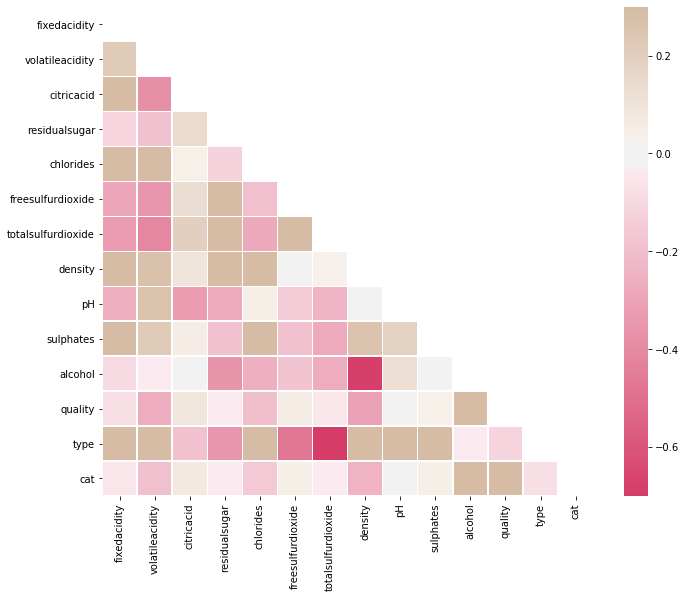

In [31]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(h_neg=1,h_pos=400, center="light", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, linewidths=.5)
plt.savefig('corr')

In [11]:
plt.savefig('corr')

<Figure size 432x288 with 0 Axes>

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scale = MinMaxScaler()
num = data.select_dtypes(include=['float64'])
cat = data.drop(columns = num.columns)
num_scale = pd.DataFrame(scale.fit_transform(num), columns = num.columns, index = num.index)
df_mm = pd.concat([num_scale, cat], axis = 1)

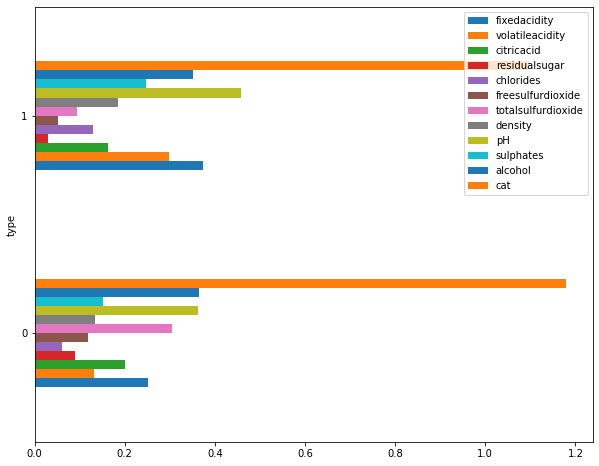

In [33]:
g = df_mm.groupby('type').mean()
# g_2 = df_ss.groupby('cat').mean()

g.drop(columns='quality').plot(kind='barh', figsize=(10,8))



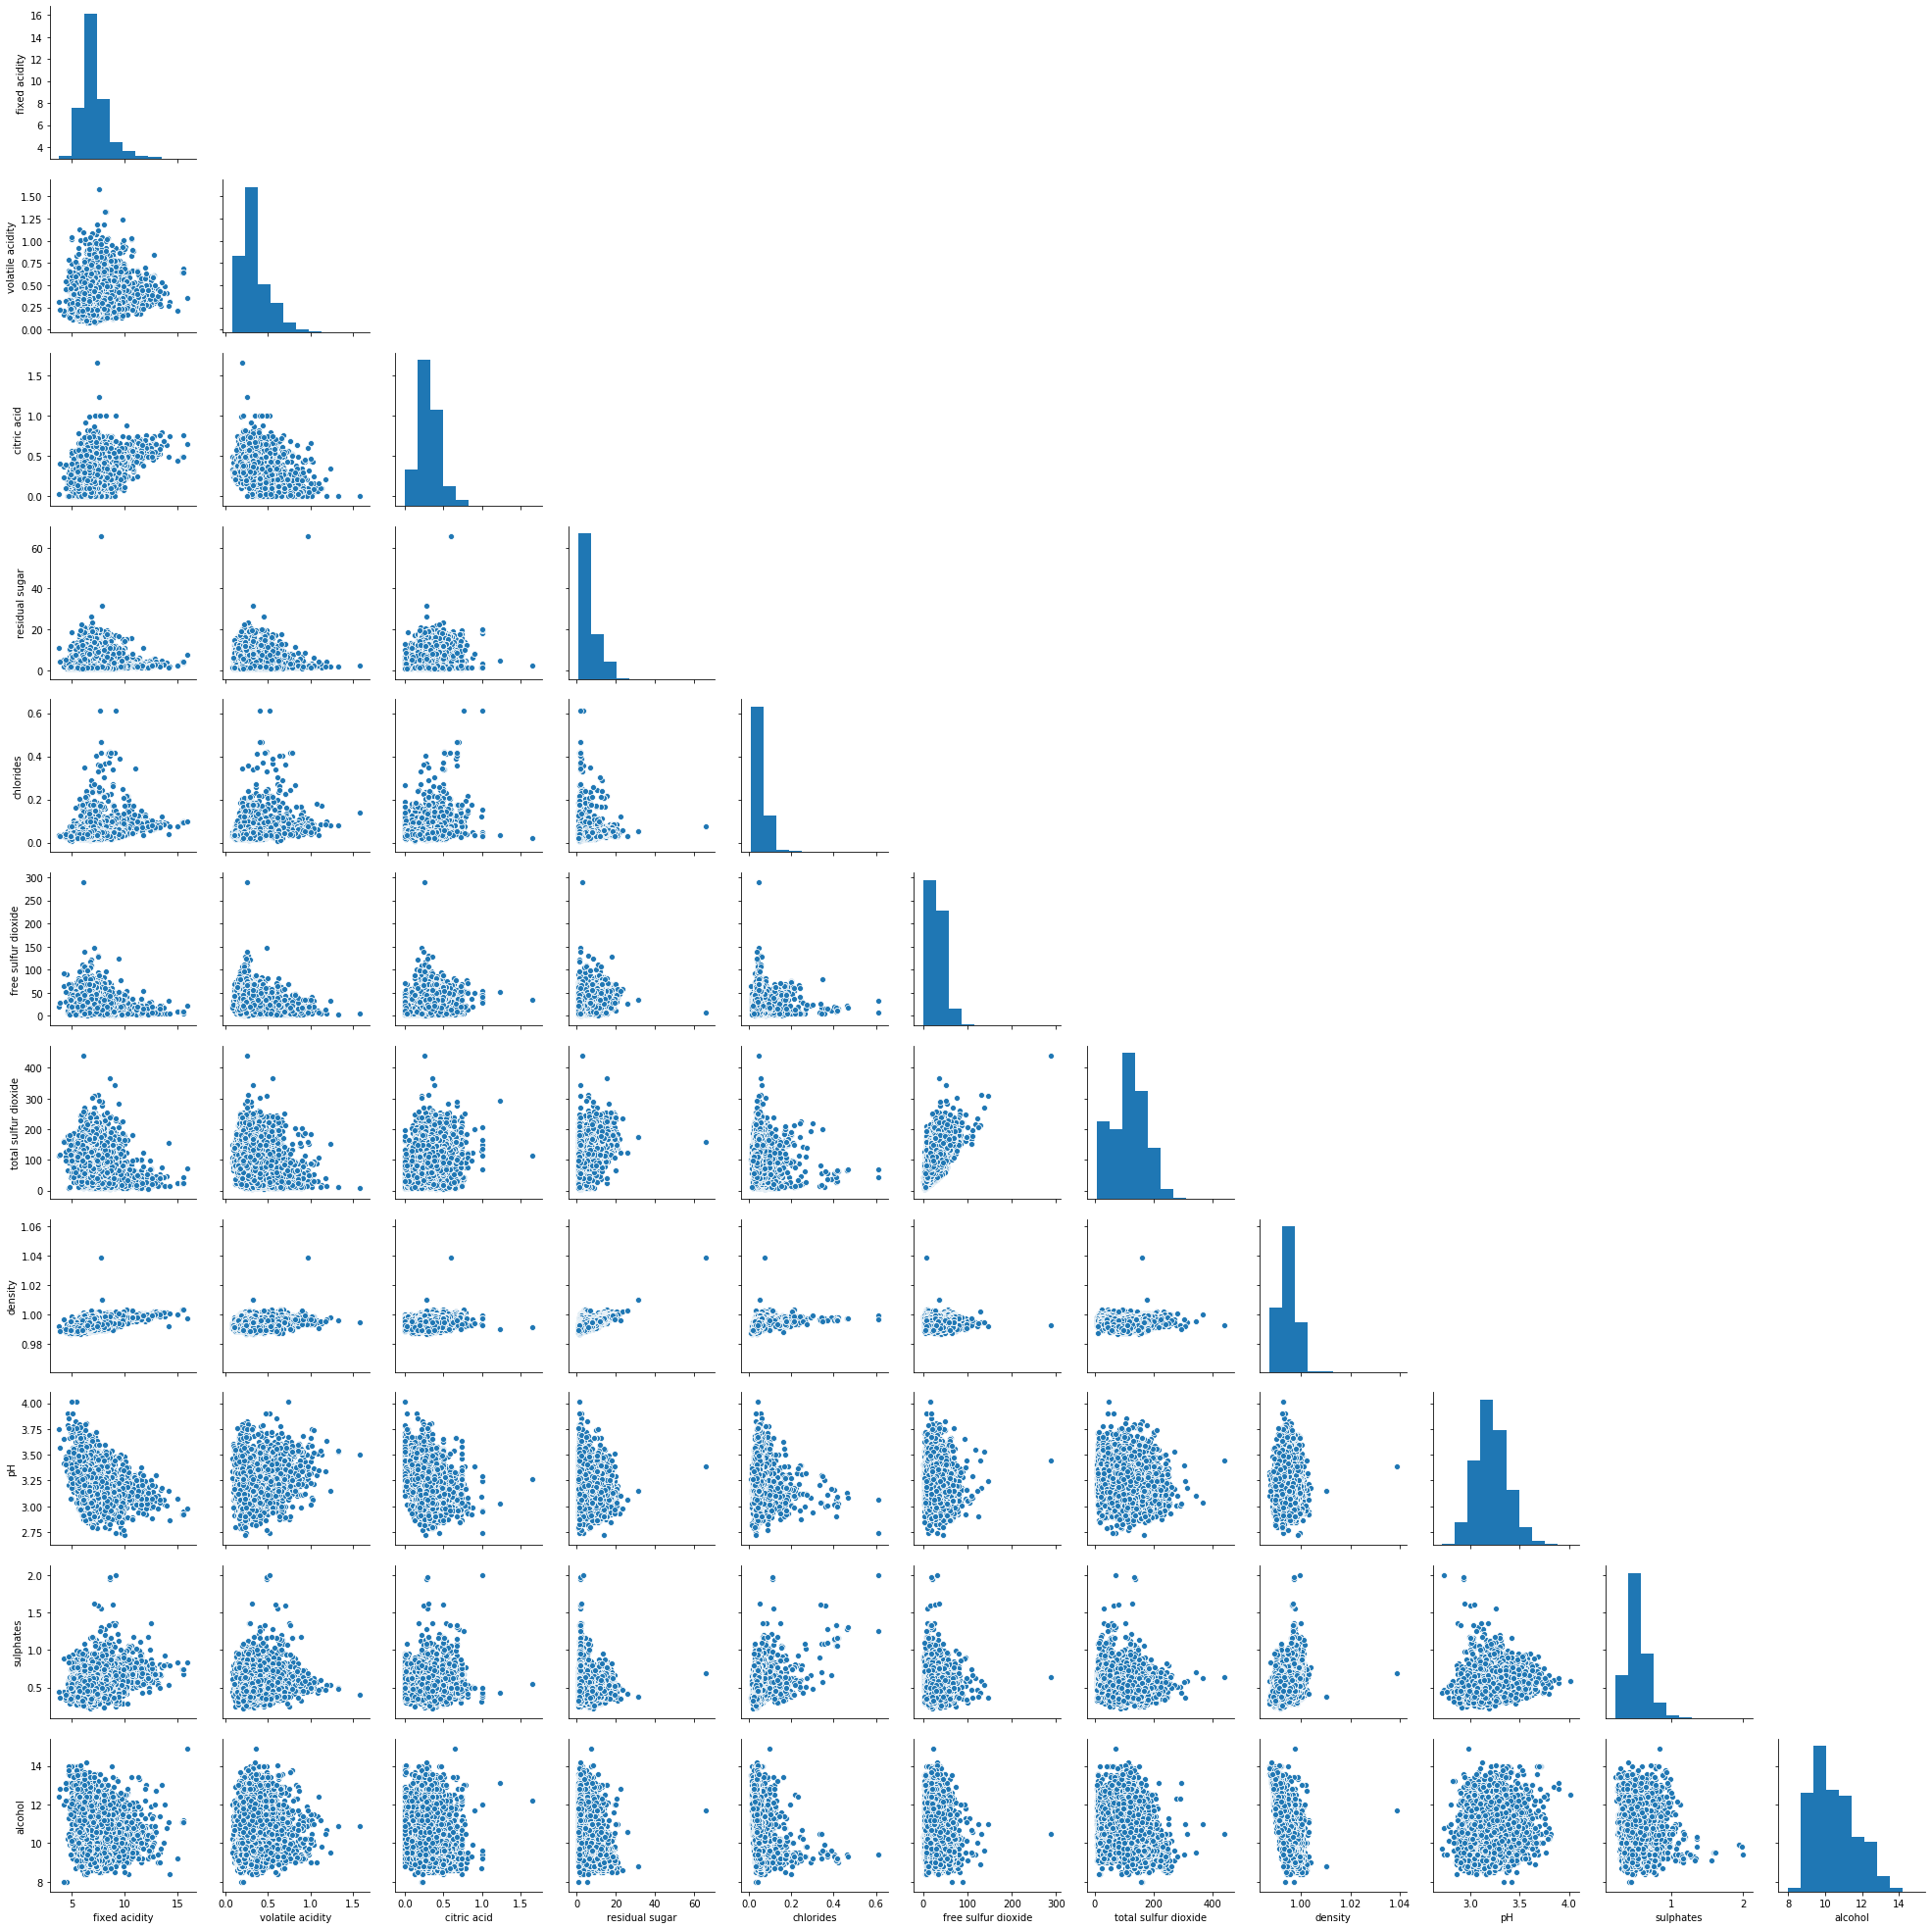

In [14]:
g = sns.pairplot(data.drop(columns=['quality','cat','type']))
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

plt.savefig('scatter')

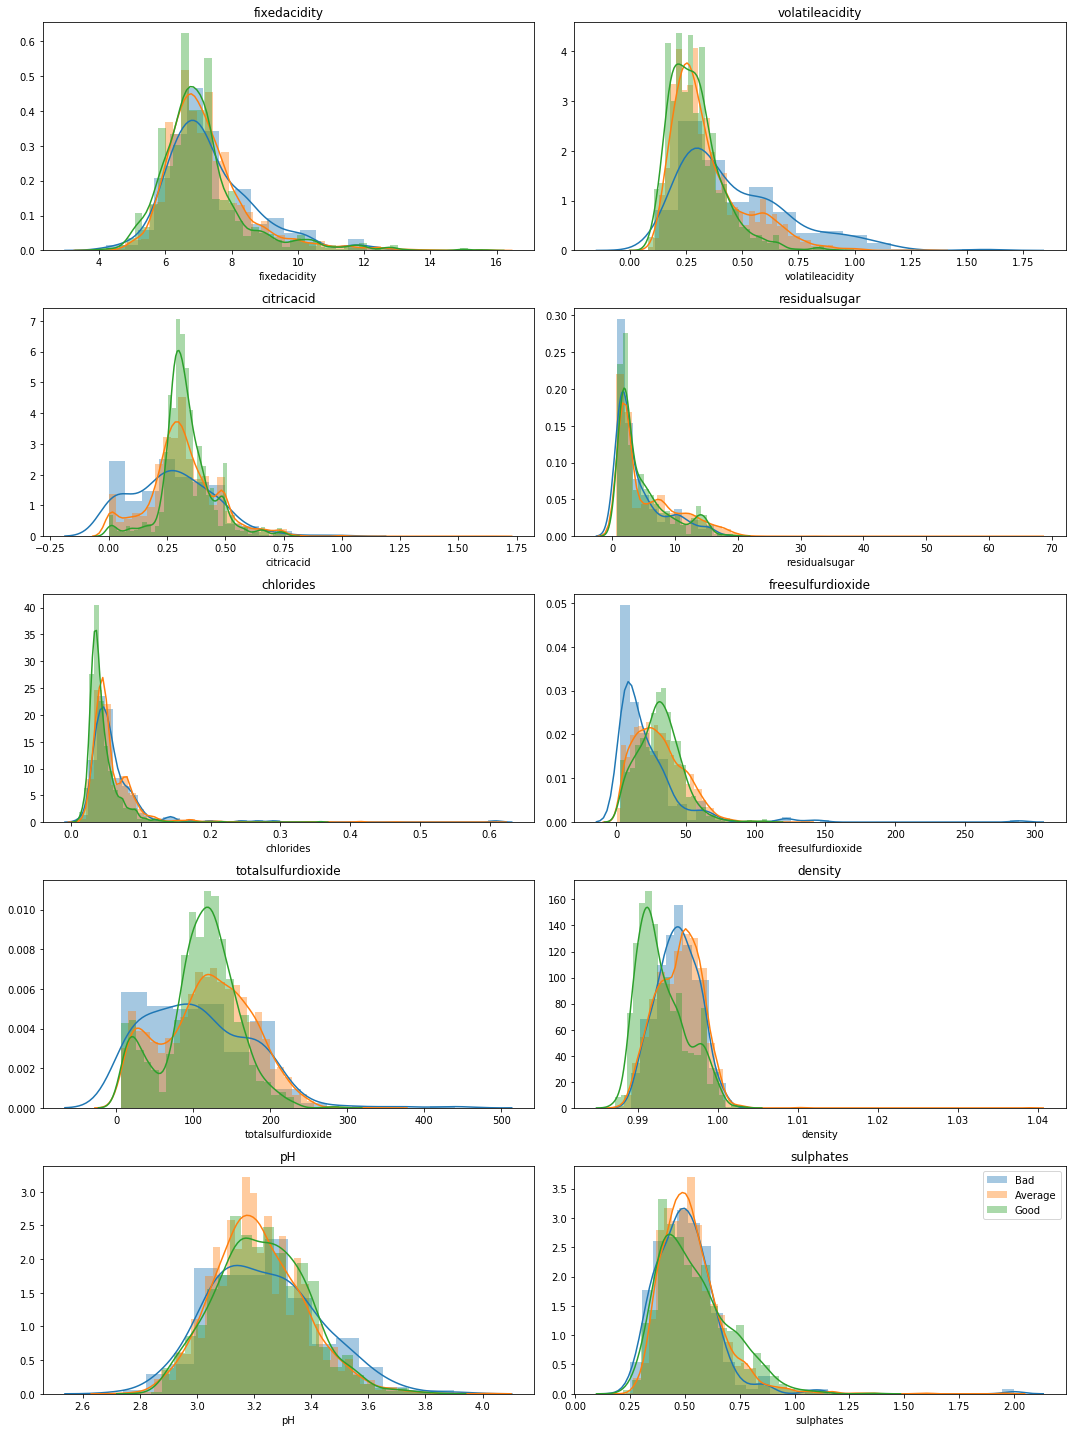

In [36]:
q_list = ['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density',
       'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(15, 20))
axes = axes.ravel()

for var, q in zip(q_list, range(0,10)):
    for i in range(0,4):
        sns.distplot(data[var].loc[(data['cat'] == i)], ax=axes[q], label=['Bad','Average', 'Good']).set_title(var)
        plt.legend(labels=['Bad','Average', 'Good'])
        fig.tight_layout()

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

fm = ExtraTreesClassifier()
fm.fit(data.values[:, 0:10], data['quality'])
print(list(zip(data.columns, fm.feature_importances_)))

[('fixedacidity', 0.0885525866898313), ('volatileacidity', 0.11124168773294311), ('citricacid', 0.09443357226634193), ('residualsugar', 0.09747865313092378), ('chlorides', 0.09900171345094376), ('freesulfurdioxide', 0.0948592521797259), ('totalsulfurdioxide', 0.09942497688860241), ('density', 0.12309689016302759), ('pH', 0.09224350508878545), ('sulphates', 0.09966716240887469)]


In [38]:
t = df_mm.groupby('cat').median()
t.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,type
cat,,,,,,,,,,,,,
0,0.272727,0.200000,0.162651,0.024540,0.069767,0.048611,0.221198,0.152304,0.391473,0.151685,0.297101,4,0
1,0.264463,0.146667,0.186747,0.038344,0.066445,0.097222,0.264977,0.159823,0.372093,0.162921,0.289855,6,0
2,0.256198,0.126667,0.192771,0.035276,0.049834,0.104167,0.248848,0.099672,0.387597,0.162921,0.507246,7,0


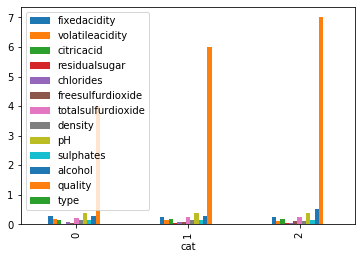

In [39]:
t.plot(kind='bar')

In [40]:
client_list = ['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol']

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


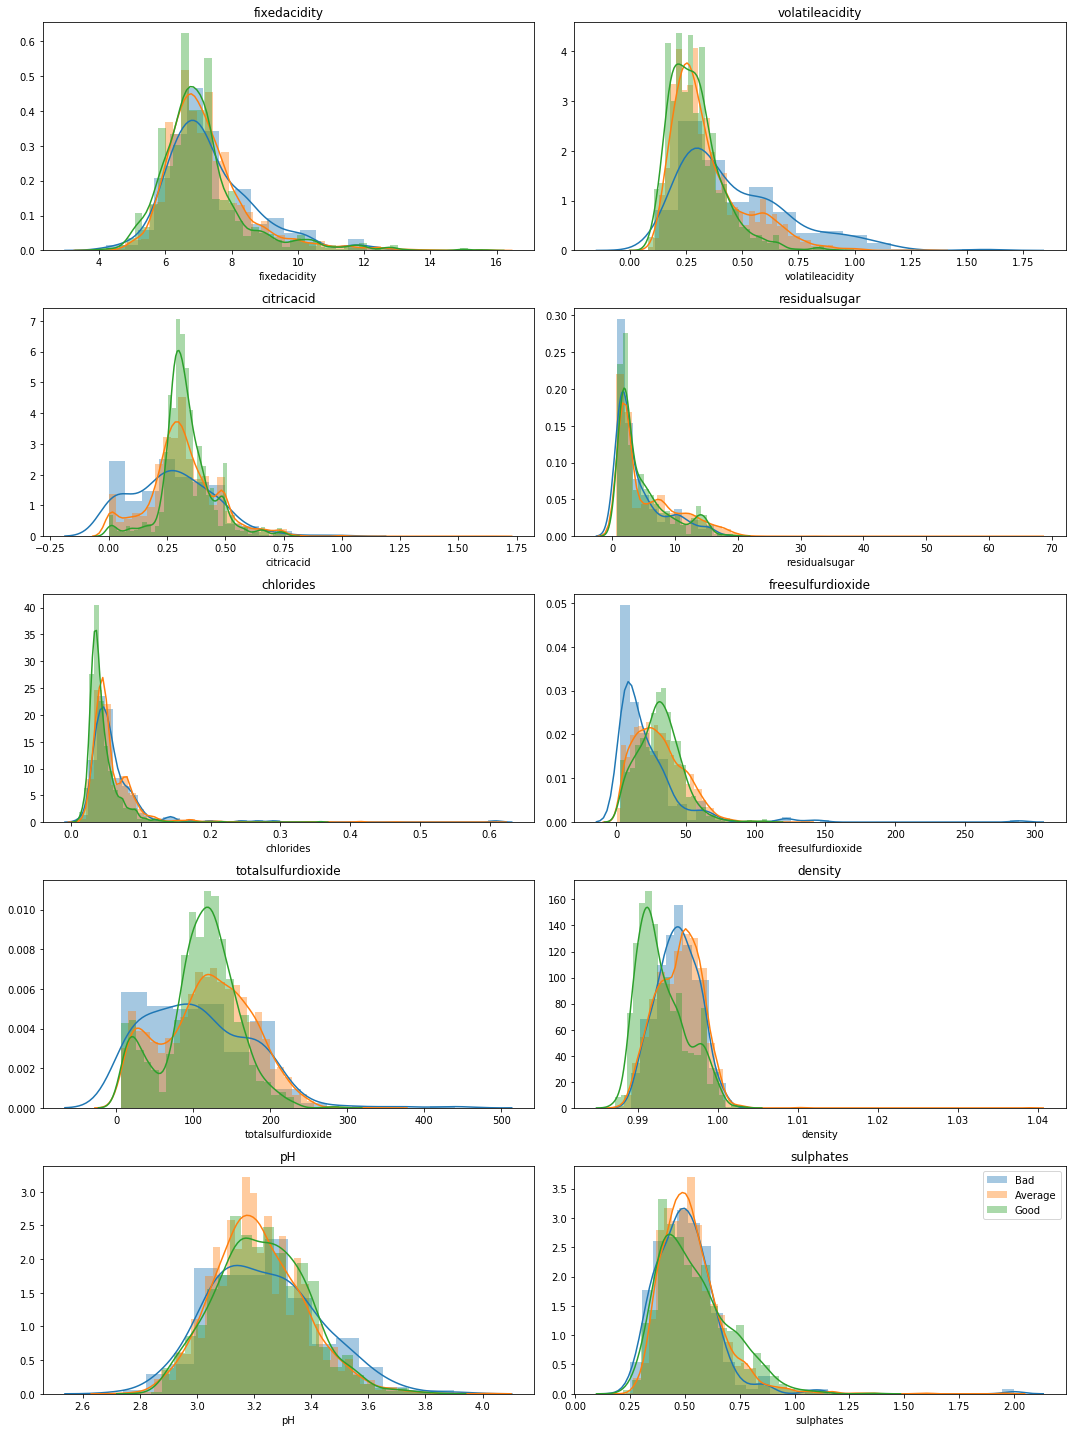

In [41]:
fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(15, 20))
axes = axes.ravel()

for var, q in zip(list(client_list), range(0,10)):
    for i in range(0,4):
        sns.distplot(data[var].loc[(data['cat'] == i)], ax=axes[q]).set_title(var)
        plt.legend(labels=['Bad','Average', 'Good'])
        fig.tight_layout()
plt.savefig('hist')

In [42]:
gd = df_mm.drop(['quality','type'], axis=1).groupby('cat').median().T

Text(0.5, 1.0, 'Wine Features per Class')

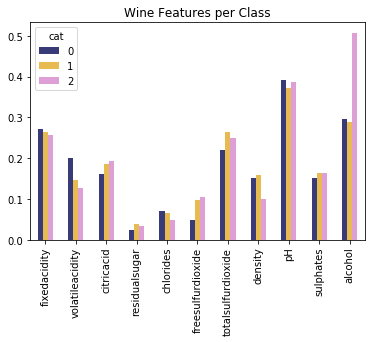

In [46]:
# fig = plt.subplots(facecolor='lightslategray')
gd.plot(kind='bar',colormap="tab20b").set_title('Wine Features per Class')